In [27]:
from pydantic import BaseModel
from langgraph.graph import START, END, StateGraph

In [28]:
from typing_extensions import TypedDict


In [29]:
class stateschema(TypedDict):
    info:str

In [30]:
def start_play(state : stateschema):
    print("This is the start node")
    return {"info" : state['info'] + " going to play"}

def play_cric(state : stateschema):
    print("This is the play cricket node")
    return {"info" : state['info'] + " cricket"}

def play_foot(state : stateschema):
    print("This is the play football node")
    return {"info" : state['info'] + " football"}

import random
from typing import Literal

def decide_play(state : stateschema) -> Literal["cricket", "football"]:
    choice = random.choice(["cricket", "football"])
    print(f"Decided to play {choice}")
    return choice

In [32]:
from IPython.display import display, Image

graph = StateGraph(stateschema)
graph.add_node("START_play", start_play)
graph.add_node("cricket", play_cric)
graph.add_node("football", play_foot)

graph.add_edge(START, "START_play")
graph.add_conditional_edges("START_play", decide_play)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

graphimage = graph.compile()

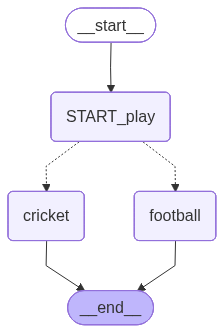

In [34]:
display(Image(graphimage.get_graph().draw_mermaid_png()))

In [ ]:
StateGraph.add_node(START, start_play)

NameError: name 'start_play' is not defined